In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance


Index(['Precip', 'Pressure', 'Humidity_2m', 'RH_2m', 'Temp_2m',
       'WetBulbTemp_2m', 'MaxTemp_2m', 'MinTemp_2m', 'TempRange_2m',
       'EarthSkinTemp', 'WindSpeed_10m', 'MaxWindSpeed_10m',
       'MinWindSpeed_10m', 'WindSpeedRange_10m', 'WindSpeed_50m',
       'MaxWindSpeed_50m', 'MinWindSpeed_50m', 'WindSpeedRange_50m',
       'isRainy'],
      dtype='object')


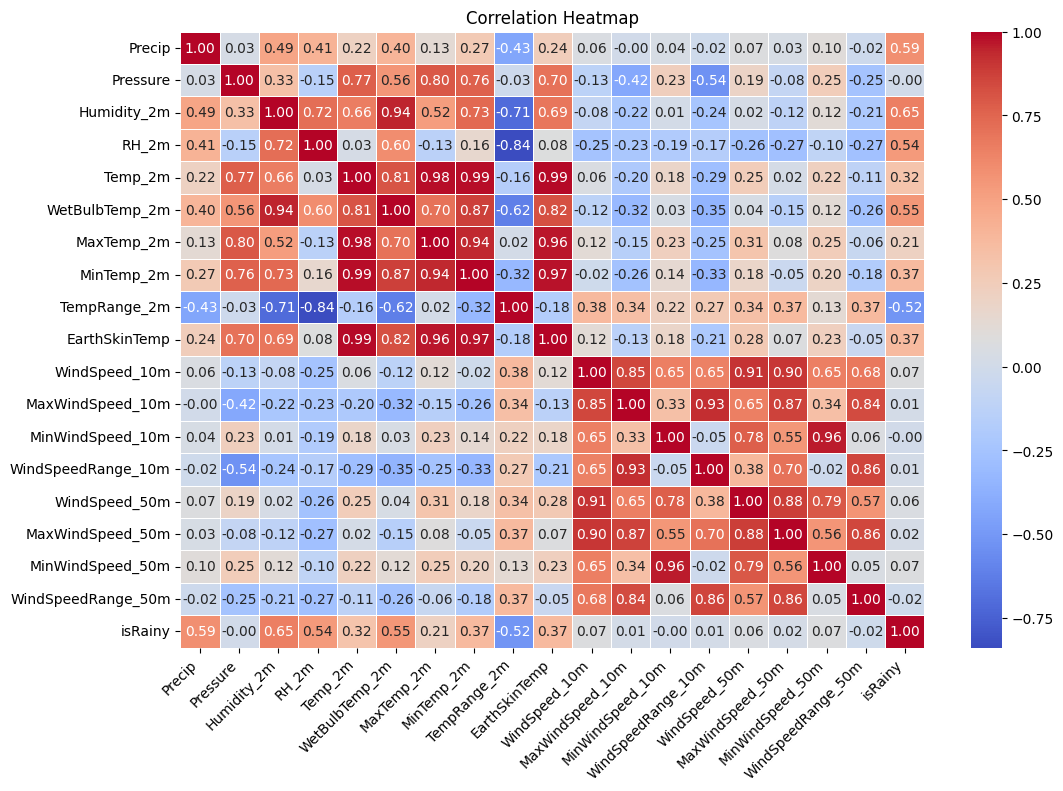

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/filtered_climate_data_final.csv")
print(df.columns)

corre = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corre, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
drop_cols = ["MaxTemp_2m", "Temp_2m", "WindSpeed_50m", "WindSpeed_10m",
             "WindSpeedRange_50m", "Pressure","Humidity_2m","Precip","isRainy","EarthSkinTemp"]
X = df.drop(columns = drop_cols)
y = df["isRainy"]

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


In [8]:
def model_evaluation(model, X_test, y_test):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  confusionMatrix = confusion_matrix(y_test, y_pred)
  return accuracy*100, report, confusionMatrix

Logistic Regression Evaluation Results:
Accuracy: 87.45%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7509
           1       0.78      0.69      0.73      2491

    accuracy                           0.87     10000
   macro avg       0.84      0.81      0.83     10000
weighted avg       0.87      0.87      0.87     10000

Confusion Matrix:
[[7022  487]
 [ 768 1723]]

Random Forest Evaluation Results:
Accuracy: 88.23%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7509
           1       0.79      0.72      0.75      2491

    accuracy                           0.88     10000
   macro avg       0.85      0.83      0.84     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
[[7039  470]
 [ 707 1784]]


Peforming HyperParameter Tuning


In [16]:
#Hyper parameter tuning
logistic_params_grid = {"C":[0.001,0.1,1.0,10],'penalty':['l1','l2'],'solver':["liblinear"]}
randomforest_params_grid = {'n_estimators':[10,50,100],'max_depth':[5,10,None],'min_samples_split': [2, 5, 10]}

logistic_grid_search = GridSearchCV(logistic_model,logistic_params_grid, cv=5, n_jobs=-1)
logistic_grid_search.fit(X_train, y_train)

best_logistic_params = logistic_grid_search.best_params_
best_logistic_model = logistic_grid_search.best_estimator_



print("Best Logistic Classifier Parameters:", best_logistic_params)


randomforest_grid_search = GridSearchCV(randomforest_model,randomforest_params_grid,cv=5, n_jobs=-1)
randomforest_grid_search.fit(X_train, y_train)

best_randomforest_params = randomforest_grid_search.best_params_
best_randomforest_model = randomforest_grid_search.best_estimator_

print("Best randomforest Classifier Parameters:", best_randomforest_params)
print("Best randomforest Classifier Model:", best_randomforest_model)




Best Logistic Classifier Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best randomforest Classifier Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best randomforest Classifier Model: RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Logistic Regression Evaluation
print(best_logistic_model)

logistic_y_pred_train = best_logistic_model.predict(X_train)
logistic_y_pred_test = best_logistic_model.predict(X_test)

# Accuracy
logistic_accuracy_train = accuracy_score(y_train, logistic_y_pred_train)
logistic_accuracy_test = accuracy_score(y_test, logistic_y_pred_test)

# Precision, Recall, F1-Score
logistic_precision_test = precision_score(y_test, logistic_y_pred_test)
logistic_recall_test = recall_score(y_test, logistic_y_pred_test)
logistic_f1_test = f1_score(y_test, logistic_y_pred_test)

# Confusion Matrix
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred_test)

print("Logistic Regression Performance (Train Data):")
print(f"Accuracy: {logistic_accuracy_train*100}")
print("Confusion Matrix (Train Data):")
print(confusion_matrix(y_train, logistic_y_pred_train))

print("Logistic Regression Performance (Test Data):")
print(f"Accuracy: {logistic_accuracy_test*100}*")
print("Confusion Matrix (Test Data):")
print(logistic_conf_matrix)
print(f"Precision: {logistic_precision_test}, Recall: {logistic_recall_test}, F1-Score: {logistic_f1_test}")


# Random Forest Evaluation
randomforest_y_pred_train = best_randomforest_model.predict(X_train)
randomforest_y_pred_test = best_randomforest_model.predict(X_test)

# Accuracy
randomforest_accuracy_train = accuracy_score(y_train, randomforest_y_pred_train)
randomforest_accuracy_test = accuracy_score(y_test, randomforest_y_pred_test)

# Precision, Recall, F1-Score
randomforest_precision_test = precision_score(y_test, randomforest_y_pred_test)
randomforest_recall_test = recall_score(y_test, randomforest_y_pred_test)
randomforest_f1_test = f1_score(y_test, randomforest_y_pred_test)

# Confusion Matrix
randomforest_conf_matrix = confusion_matrix(y_test, randomforest_y_pred_test)

print("Random Forest Performance (Train Data):")
print(f"Accuracy: {randomforest_accuracy_train*100}")
print("Confusion Matrix (Train Data):")
print(confusion_matrix(y_train, randomforest_y_pred_train))

print("Random Forest Performance (Test Data):")
print(f"Accuracy: {randomforest_accuracy_test*100}")
print("Confusion Matrix (Test Data):")
print(randomforest_conf_matrix)
print(f"Precision: {randomforest_precision_test}, Recall: {randomforest_recall_test}, F1-Score: {randomforest_f1_test}")


LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')
Logistic Regression Performance (Train Data):
Accuracy: 87.1
Confusion Matrix (Train Data):
[[27920  2085]
 [ 3075  6920]]
Logistic Regression Performance (Test Data):
Accuracy: 87.38*
Confusion Matrix (Test Data):
[[7020  489]
 [ 773 1718]]
Precision: 0.7784322609877662, Recall: 0.6896828582898434, F1-Score: 0.7313750532141337
Random Forest Performance (Train Data):
Accuracy: 99.1525
Confusion Matrix (Train Data):
[[29909    96]
 [  243  9752]]
Random Forest Performance (Test Data):
Accuracy: 90.11
Confusion Matrix (Test Data):
[[7072  437]
 [ 552 1939]]
Precision: 0.8160774410774411, Recall: 0.7784022480931353, F1-Score: 0.7967947400862955


Best feature selection

In [17]:
#Best features selection

# Since from the above correlation heat map we can see the datas are highly correlated and PCA works best for datas with high correlation.

pca = PCA(n_components = 5) #reduces to 10 features
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

print("PCA Components (Principal Components):")
print(pca.components_)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)  # Shows how much info is retained


print("New shape of X_train:", X_train_pca.shape)

PCA Components (Principal Components):
[[ 0.92263868  0.3356933   0.14260013 -0.12216611 -0.01632099 -0.00379684
  -0.01252751 -0.01855843 -0.0025257 ]
 [-0.32670419  0.57905231  0.74574531 -0.00247731 -0.01889754  0.01089741
  -0.0298014   0.01041843  0.01865606]
 [ 0.04442718  0.09856728 -0.03909409  0.34776188  0.52755248  0.09497267
   0.43257655  0.60489787  0.15965184]
 [ 0.00343383  0.37833749 -0.30262054  0.79246085 -0.23181551  0.00672745
  -0.23850472 -0.16283303 -0.00963204]
 [ 0.01493674 -0.07718538  0.01545381 -0.0840801  -0.11127867  0.42221433
  -0.53355507  0.30210483  0.64800833]]
Explained Variance Ratio: [0.76707487 0.21738889 0.00799668 0.00441686 0.00156402]
New shape of X_train: (40000, 5)


In [13]:
best_model = "RandomForest Classifier" if randomforest_accuracy_test*100 > logistic_accuracy_test*100 else "Logistic Classifier"
print(f"\nBest performing model: {best_model}")


Best performing model: RandomForest Classifier


In [18]:
#FINAL MODEL USING BEST PARAMETER AND FEATURES

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Redefine X and y
# Assuming you already have X and y prepared from the original dataset.
X = df.drop(columns=["Precip", "isRainy"])  # Adjust based on your actual dataset
y = df["isRainy"]  # Or whatever your target variable is

# Step 2: Apply PCA transformation
pca = PCA(n_components=5)  # Set the number of components you want (based on the explained variance ratio)
X_pca = pca.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model on PCA-transformed data
final_randomforest_model = RandomForestClassifier(
    n_estimators=20,
    max_depth=best_randomforest_params['max_depth'],
    min_samples_split=best_randomforest_params['min_samples_split'],
    random_state=42
)

# Train the model on the PCA-transformed training data
final_randomforest_model.fit(X_train_pca, y_train)

# Step 5: Predict on the training and test sets
randomforest_y_pred_train = final_randomforest_model.predict(X_train_pca)
randomforest_y_pred_test = final_randomforest_model.predict(X_test_pca)

# Train Data Metrics
randomforest_accuracy_train = accuracy_score(y_train, randomforest_y_pred_train)
randomforest_precision_train = precision_score(y_train, randomforest_y_pred_train)
randomforest_recall_train = recall_score(y_train, randomforest_y_pred_train)
randomforest_f1_train = f1_score(y_train, randomforest_y_pred_train)

# Test Data Metrics
randomforest_accuracy_test = accuracy_score(y_test, randomforest_y_pred_test)
randomforest_precision_test = precision_score(y_test, randomforest_y_pred_test)
randomforest_recall_test = recall_score(y_test, randomforest_y_pred_test)
randomforest_f1_test = f1_score(y_test, randomforest_y_pred_test)

randomforest_conf_matrix_train = confusion_matrix(y_train, randomforest_y_pred_train)
randomforest_conf_matrix_test = confusion_matrix(y_test, randomforest_y_pred_test)

# Print Performance Metrics
print("Random Forest Final Model Performance (Train Data):")
print(f"Accuracy: {randomforest_accuracy_train * 100:.2f}%")
print("Confusion Matrix (Train Data):")
print(randomforest_conf_matrix_train)
print(f"Precision: {randomforest_precision_train:.2f}, Recall: {randomforest_recall_train:.2f}, F1-Score: {randomforest_f1_train:.2f}")

print("\nRandom Forest Final Model Performance (Test Data):")
print(f"Accuracy: {randomforest_accuracy_test * 100:.2f}%")
print("Confusion Matrix (Test Data):")
print(randomforest_conf_matrix_test)
print(f"Precision: {randomforest_precision_test:.2f}, Recall: {randomforest_recall_test:.2f}, F1-Score: {randomforest_f1_test:.2f}")



Random Forest Final Model Performance (Train Data):
Accuracy: 98.83%
Confusion Matrix (Train Data):
[[29834   171]
 [  299  9696]]
Precision: 0.98, Recall: 0.97, F1-Score: 0.98

Random Forest Final Model Performance (Test Data):
Accuracy: 90.52%
Confusion Matrix (Test Data):
[[7088  421]
 [ 527 1964]]
Precision: 0.82, Recall: 0.79, F1-Score: 0.81
